In [7]:
import pandas as pd
import numpy as np
import yfinance as yfi
from statsmodels.tsa.arima.model import ARIMA
from statsmodels import tsa
from pmdarima.arima import auto_arima

In [3]:
data_open = yfi.Ticker('AAPL').history(period='1y',interval='1d')['Open']

In [8]:
auto_arima(data_open)

ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

In [10]:
model = ARIMA(data_open, order = (1,0,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  252
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -569.253
Date:                Sat, 13 Apr 2024   AIC                           1144.506
Time:                        15:32:03   BIC                           1155.094
Sample:                             0   HQIC                          1148.767
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        177.6895      4.045     43.923      0.000     169.761     185.618
ar.L1          0.9722      0.016     61.973      0.000       0.941       1.003
sigma2         5.3041      0.304     17.437      0.0

C:\Users\lvden\anaconda3\envs\Data-analysis\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lvden\anaconda3\envs\Data-analysis\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lvden\anaconda3\envs\Data-analysis\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: ylabel='Density'>

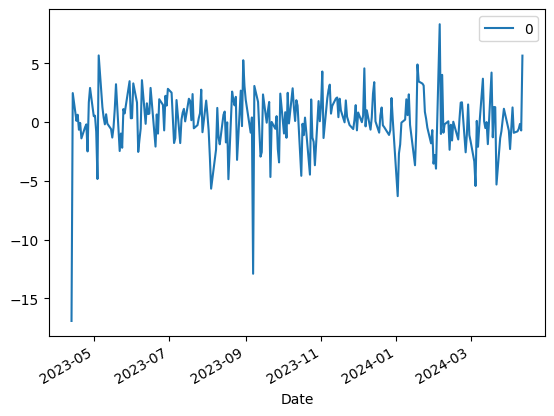

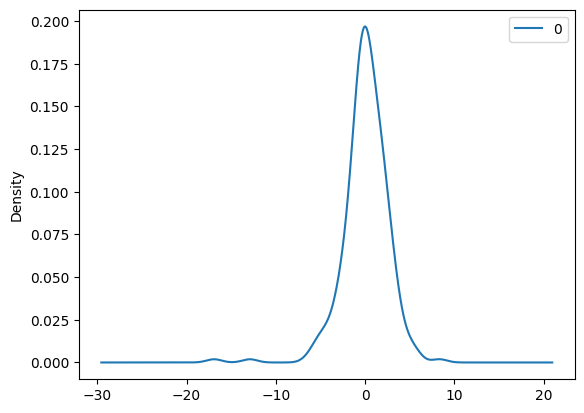

In [12]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')

In [25]:
output = model_fit.forecast(steps=10)
output.index = pd.date_range(data_open.index[-1], periods=11)[1:]

C:\Users\lvden\anaconda3\envs\Data-analysis\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lvden\anaconda3\envs\Data-analysis\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [24]:
# print(data_open.index[-1])
# pd.date_range(data_open.index[-1], periods=11)[1:]

2024-04-12 00:00:00-04:00


DatetimeIndex(['2024-04-13 00:00:00-04:00', '2024-04-14 00:00:00-04:00',
               '2024-04-15 00:00:00-04:00', '2024-04-16 00:00:00-04:00',
               '2024-04-17 00:00:00-04:00', '2024-04-18 00:00:00-04:00',
               '2024-04-19 00:00:00-04:00', '2024-04-20 00:00:00-04:00',
               '2024-04-21 00:00:00-04:00', '2024-04-22 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', freq='D')

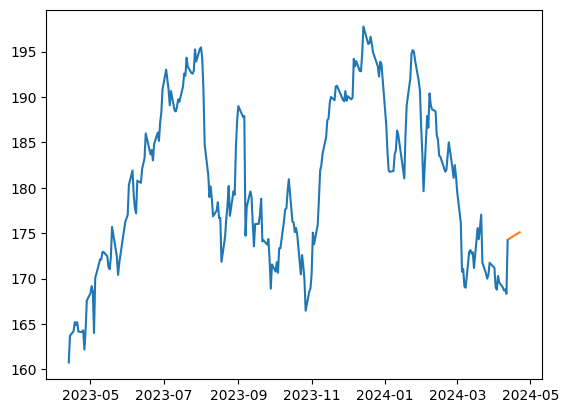

In [26]:
import matplotlib.pyplot as plt
plt.plot(data_open)
plt.plot(output)